# Restaurant Recommendation System
## Exploratory Data Analysis and Visualisations

## Business Understanding

A new lifestyle startup, Butterly.com, is seeking to offer restaurant suggestions via their web and mobile applications. They have a growing user base of food lovers and socialites keen to find the latest and greatest places to eat out in cities around the world. They would like a recommendation system to suggest appropriate establishments to its existing users based on their exitsing data and also to engage with new users by recommending restaurants based on minimal feedback or.

The startup has its roots in Scotland so initially they would like to use Edinburgh as a test case before investing in a more global product.

In [13]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
pwd

'/Users/jamesmoulds/Desktop/projects/capstone/capstone_projectA/notebooks'

In [17]:
!ls

Data Cleaning.ipynb       Restaurant Data EDA.ipynb Yelp API Request.ipynb
Drafts                    User Data EDA.ipynb       restaurants.csv


In [18]:
df_biz = pd.read_csv('../../yelp_data/yelp_business.csv')
df_attr = pd.read_csv('../../yelp_data/yelp_business_attributes.csv')

In [19]:
pd.set_option('display.max_columns', None)

### Business data high level review

In [20]:
df_biz.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [21]:
df_biz.shape

(174567, 13)

In [22]:
df_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   174567 non-null  object 
 1   name          174567 non-null  object 
 2   neighborhood  68015 non-null   object 
 3   address       174567 non-null  object 
 4   city          174566 non-null  object 
 5   state         174566 non-null  object 
 6   postal_code   173944 non-null  object 
 7   latitude      174566 non-null  float64
 8   longitude     174566 non-null  float64
 9   stars         174567 non-null  float64
 10  review_count  174567 non-null  int64  
 11  is_open       174567 non-null  int64  
 12  categories    174567 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


### Business Attributes High Level Review

In [23]:
df_attr.head()

business_id AcceptsInsurance ByAppointmentOnly  \
0  FYWN1wneV18bWNgQjJ2GNg               Na                Na   
1  He-G7vWjzVUysIKrfNbPUQ               Na                Na   
2  8DShNS-LuFqpEWIp0HxijA               Na                Na   
3  PfOCPjBrlQAnz__NXj9h_w               Na                Na   
4  o9eMRCWt5PkpLDE0gOPtcQ               Na                Na   

  BusinessAcceptsCreditCards BusinessParking_garage BusinessParking_street  \
0                         Na                   True                     Na   
1                         Na                     Na                     Na   
2                         Na                     Na                     Na   
3                         Na                     Na                     Na   
4                         Na                     Na                  False   

  BusinessParking_validated BusinessParking_lot BusinessParking_valet  \
0                        Na                  Na                    Na   
1                        Na                  Na                    Na   
2                        Na                  Na                    Na   
3                        Na                  Na                    Na   
4                     False               False                 False   

  HairSpecializesIn_coloring HairSpecializesIn_africanamerican  \
0                         Na                                Na   
1                         Na                                Na   
2                         Na                                Na   
3                         Na                                Na   
4                      False                                Na   

  HairSpecializesIn_curly HairSpecializesIn_perms HairSpecializesIn_kids  \
0                      Na                      Na                     Na   
1                      Na                      Na                     Na   
2                      Na                      Na                     Na   
3                      Na                      Na                     Na   
4                      Na                      Na                     Na   

  HairSpecializesIn_extensions HairSpecializesIn_asian  \
0                           Na                      Na   
1                           Na                      Na   
2                           Na                      Na   
3                           Na                      Na   
4                           Na                      Na   

  HairSpecializesIn_straightperms RestaurantsPriceRange2 GoodForKids  \
0                              Na                     Na          Na   
1                              Na                     Na          Na   
2                              Na                     Na          Na   
3                              Na                     Na          Na   
4                              Na                     Na          Na   

  WheelchairAccessible BikeParking Alcohol HasTV NoiseLevel RestaurantsAttire  \
0                   Na          Na      Na    Na         Na                Na   
1                   Na        True      Na    Na         Na                Na   
2                   Na          Na    True    Na         Na                Na   
3                   Na          Na      Na    Na         Na                Na   
4                   Na       False      Na    Na         Na                Na   

  Music_dj Music_background_music Music_no_music Music_karaoke Music_live  \
0       Na                     Na             Na            Na         Na   
1       Na                     Na             Na            Na         Na   
2       Na                     Na             Na            Na         Na   
3       Na                     Na             Na            Na         Na   
4       Na                     Na             Na            Na         Na   

  Music_video Music_jukebox Ambience_romantic Ambience_intimate  \
0          Na            Na                Na                Na   
1

In [24]:
df_attr.shape

(152041, 82)

In [25]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152041 entries, 0 to 152040
Data columns (total 82 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   business_id                        152041 non-null  object
 1   AcceptsInsurance                   152041 non-null  object
 2   ByAppointmentOnly                  152041 non-null  object
 3   BusinessAcceptsCreditCards         152041 non-null  object
 4   BusinessParking_garage             152041 non-null  object
 5   BusinessParking_street             152041 non-null  object
 6   BusinessParking_validated          152041 non-null  object
 7   BusinessParking_lot                152041 non-null  object
 8   BusinessParking_valet              152041 non-null  object
 9   HairSpecializesIn_coloring         152041 non-null  object
 10  HairSpecializesIn_africanamerican  152041 non-null  object
 11  HairSpecializesIn_curly            152041 non-null  

In [26]:
#Check number of null values
df_biz.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [27]:
#let's drop the next-to-useless neighborhood column as it is infested with nulls. 
df_biz.drop(columns='neighborhood', inplace=True)

In [28]:
df_biz.head()

business_id                        name  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [29]:
df_biz.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories'],
      dtype='object')

In [30]:
# df1 = df['city'].str.contains("London")
# df1

We're looking to create a recommender for London so let's see how many London entries we have?

In [31]:
df_biz[df_biz.city.str.contains('Lond',case=False, na=False)]

business_id    name          address    city state  \
153780  u5kz5EpdSoRNUvKMXtGQfw  "Asda"  "Old Kent Road"  London   EDH   

       postal_code   latitude  longitude  stars  review_count  is_open  \
153780     EH7 5TQ  55.956276  -3.163425    3.0             4        1   

                                               categories  
153780  Professional Services;Graphic Design;Accessori...

Only One!!! Yelp what have you done!!! 
We were expecting a decent London centric data set but this is not the case. Let's see if we can keep the project UK based by searching appropriate latitude values. 

In [32]:
df_biz[df_biz['longitude'].between(-4, 0, inclusive=False)].head()

business_id                           name  \
68   F31RycVVooeIOp9jsXmg6g            "The Bluebird Cafe"   
214  KbSoYXHUz_Bjo-v0VWHDrw            "St. Andrew Square"   
266  Po2W_ZiJdxItHHll4WP5WA  "Thomsons World Of Furniture"   
353  3gM8zh_OaubYXNnQNxAYKQ                     "Planet X"   
380  inaACfObL1NBNJmBG11iuQ                  "Global Deli"   

                             address         city state postal_code  \
68                    "5 Canonmills"    Edinburgh   MLN     EH3 5HA   
214                   "St Andrew Sq"    Edinburgh   EDH       EH1 1   
266        "Kingseat Road, Halbeath"  Dunfermline   FIF    KY11 8PQ   
353          "74 South Clerk Street"    Edinburgh   EDH         EH8   
380  "13 George IV Bridge, Old Town"    Edinburgh   EDH     EH1 1EE   

      latitude  longitude  stars  review_count  is_open  \
68   55.962444  -3.197662    4.5            16        1   
214  55.953860  -3.191788    4.5            14        1   
266  56.082844  -3.402846    3.5             3        1   
353  55.939643  -3.180275    2.5             3        1   
380  55.947960  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
214                     Active Life;Parks;Local Flavor  
266            Shopping;Home & Garden;Furniture Stores  
353  Sports Wear;Sporting Goods;Shopping;Bikes;Fashion  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

It looks like Edinburgh could be well respresented in this set. Let's see if there's anything to work with?

In [33]:
edin = df_biz[df_biz.city.str.contains('Edin',case=False, na=False)]
edin.head()

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
214  KbSoYXHUz_Bjo-v0VWHDrw  "St. Andrew Square"   
353  3gM8zh_OaubYXNnQNxAYKQ           "Planet X"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A     "The Rendezvous"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
214                   "St Andrew Sq"  Edinburgh   EDH       EH1 1  55.953860   
353          "74 South Clerk Street"  Edinburgh   EDH         EH8  55.939643   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
214  -3.191788    4.5            14        1   
353  -3.180275    2.5             3        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
214                     Active Life;Parks;Local Flavor  
353  Sports Wear;Sporting Goods;Shopping;Bikes;Fashion  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese

In [34]:
edin_rest = edin[edin.categories.str.contains('Rest', case=False, na=False)]
edin_rest.head()

business_id                   name  \
68   F31RycVVooeIOp9jsXmg6g    "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ          "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A       "The Rendezvous"   
420  OvbLKXkJCg8ZMHX9L5faIA    "Bread Meats Bread"   
446  T2jfXhvQPk9wLdt1OVV-Kg  "Rose Street Brewery"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   
420                "92 Lothian Road"  Edinburgh   EDH     EH3 9BE  55.946390   
446              "55-57 Rose Street"  Edinburgh   EDH     EH2 2NH  55.952835   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   
420  -3.205829    4.0            28        1   
446  -3.198560    3.0            24        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese  
420                                Burgers;Restaurants  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...

In [35]:
edin_rest.business_id.nunique()

1605

In [36]:
edin_rest.shape

(1605, 12)

In [37]:
edin_rest.review_count.sum()

28404

In [38]:
edin_rest.to_csv('restaurants.csv')

So there are 1605 restaurant entries for Edinburgh. And atotal of 28404 reviews. 

In [39]:
#calculate average number of reviews per resturant in Edinburgh. 

Our original plan was to use the yelp open source database to form our base data set for a London centric recommendation engine. It turns ourt there is only one business listed in London within the data set. However we found that Edinburgh is rather well represented in comparison with 1605 restaurant entries.  Should we opt for Edinburgh and see if we can also gather data from yelp and google api to add to the mix. 

Let's just double check that Edinburgh is indeed our top listed city in the UK. Let's start by visualising the top listed cities in the entire data set! We'll filter for restaurants as we're not interested in other business types. 

In [40]:
#First we'll create a dataframe solely comprised of restaurants
top_listed = df_biz[df_biz.categories.str.contains('Rest', case=False, na=False)]
top_listed.head(2)

business_id                        name           address  \
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"    "581 Howe Ave"   
5  o9eMRCWt5PkpLDE0gOPtcQ                   "Messina"  "Richterstr. 11"   

             city state postal_code   latitude  longitude  stars  \
4  Cuyahoga Falls    OH       44221  41.119535  -81.47569    3.5   
5       Stuttgart    BW       70567  48.727200    9.14795    4.0   

   review_count  is_open                                         categories  
4           116        1  American (New);Nightlife;Bars;Sandwiches;Ameri...  
5             5        1                                Italian;Restaurants

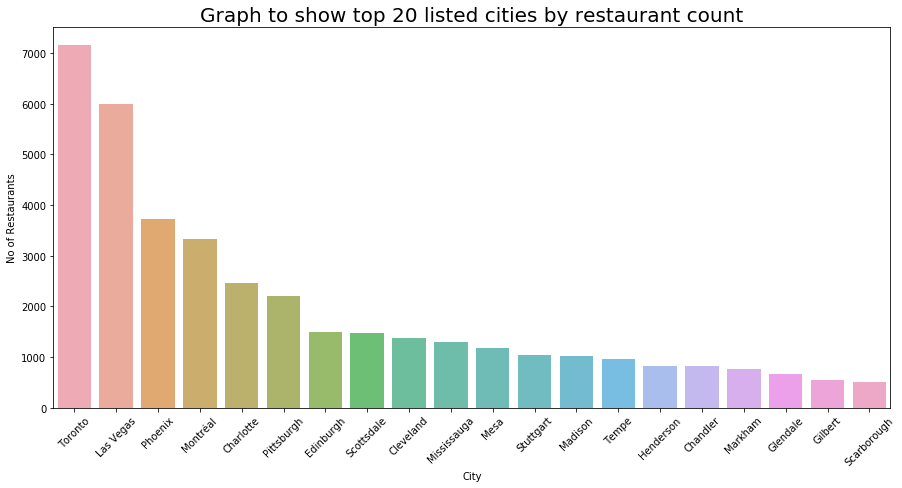

In [41]:
# Create visualisation 
city = top_listed['city'].value_counts()
city = city.sort_values(ascending=False).iloc[0:20]

plt.figure(figsize=(15,7))

ax = sns.barplot(city.index, city.values, alpha=0.8)

plt.title('Graph to show top 20 listed cities by restaurant count', fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('No of Restaurants')
plt.xlabel('City')



plt.show()

Edinburgh is 7th in the list of most restaurants. If we wanted to prioritise any proof of concept there may be an argument that we should opt for Toronto as our target city! However as we intend to utilise an API to introduce more data then let's see how we can improve the Endinburgh data set first.

Let's explore the Edinburgh data set some more in its current form. 

## Ratings

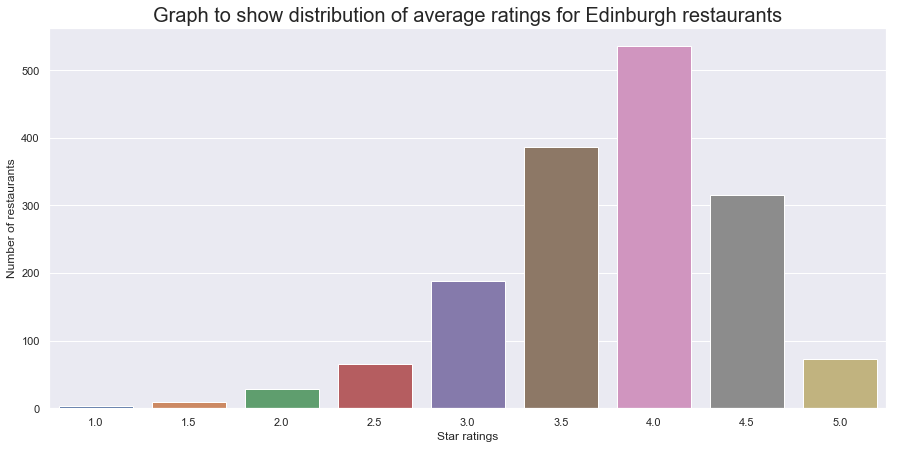

In [42]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (15,7)})
sns.countplot(x='stars', data=edin_rest)#.set_title("Graph to show distribution of ratings")
plt.title('Graph to show distribution of average ratings for Edinburgh restaurants', fontsize=20)
plt.ylabel('Number of restaurants', fontsize=12)
plt.xlabel('Star ratings', fontsize=12)
plt.show()

In [43]:
review_count = edin_rest[['stars', 'review_count']]
print(review_count.shape)
review_count.head()

(1605, 2)


stars  review_count
68     4.5            16
380    4.0            13
397    3.5            19
420    4.0            28
446    3.0            24

## Most Reviewed

In [44]:
edin_rest.head(2)

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

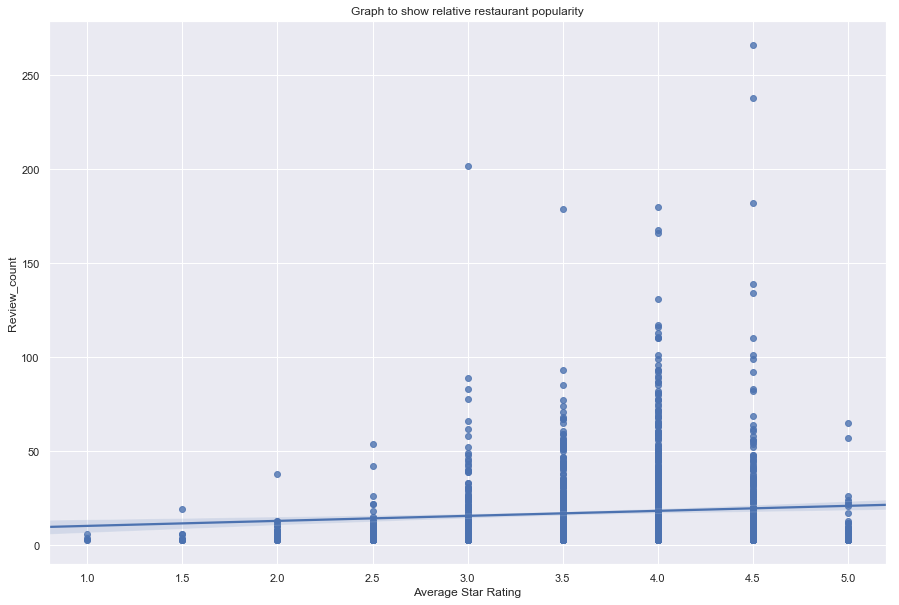

In [45]:
top_restaurants = edin_rest.sort_values(['review_count'],ascending=False).index[:15]

x = edin_rest.stars
y = edin_rest.review_count
labels = edin_rest.name

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Graph to show relative restaurant popularity')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Average Star Rating')
ax.set_ylabel('Review_count')

for i, t in enumerate(labels):
    if t in top_restaurants:
        ax.annotate(t,(x[i],y[i]))

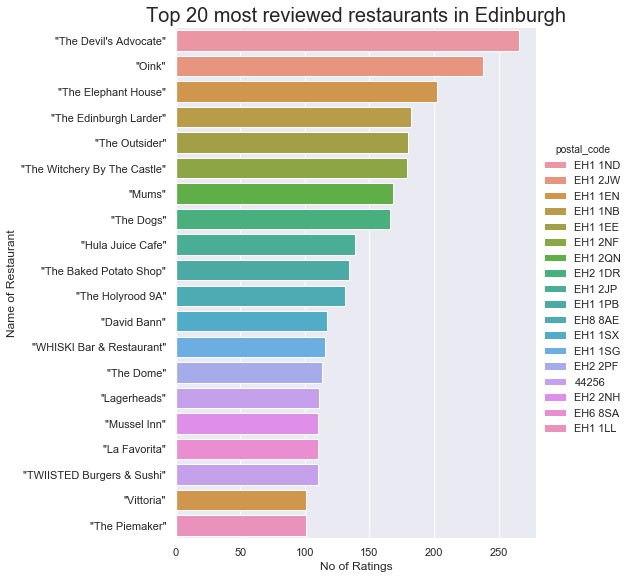

In [46]:
#Let's plot the top 20 most reviewed restaurants in Edinburgh, let's have a look at the postcodes to see 
#if there are any geographical hotspots that we might want to investigate further!


sns.catplot(x='review_count', y='name', data=edin_rest.nlargest(20, 'review_count'), kind='bar',
           hue='postal_code', dodge=False, height=8);
plt.title('Top 20 most reviewed restaurants in Edinburgh', fontsize=20)
plt.xlabel('No of Ratings')
plt.ylabel('Name of Restaurant')
plt.show()

We can see that EH1 as a postal area seems to dominate in terms of highly rated restaurants. 

In [47]:
#Best restaurants by overall stars awarded  - Largely for novelty let's see which restuarants have the most stars?


stars_awarded = edin_rest[['name','stars', 'review_count', 'postal_code', 'categories']]
#stars_awarded['stars_awarded']
stars_awarded['star_count'] = stars_awarded['stars']*stars_awarded['review_count']
stars_awarded.head()

name  stars  review_count postal_code  \
68     "The Bluebird Cafe"    4.5            16     EH3 5HA   
380          "Global Deli"    4.0            13     EH1 1EE   
397       "The Rendezvous"    3.5            19     EH2 4PG   
420    "Bread Meats Bread"    4.0            28     EH3 9BE   
446  "Rose Street Brewery"    3.0            24     EH2 2NH   

                                            categories  star_count  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...        72.0  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis        52.0  
397                      Restaurants;Cantonese;Chinese        66.5  
420                                Burgers;Restaurants       112.0  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...        72.0

Note to reader and self, bear in mind that a restaurant that has 1 stars across 100 reviews will have more stars than 
a newer restaurant that has 5 stars but only across 19 reviews. Any insight should be viewed with caution. 

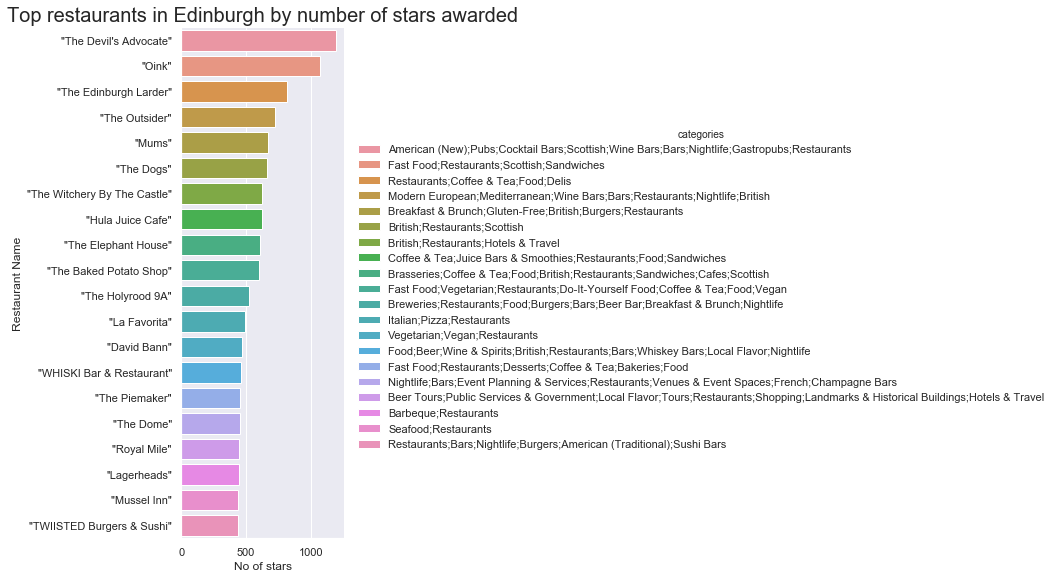

In [48]:
# plt.figure(figsize=(12,7))
sns.catplot(x='star_count', y='name', data=stars_awarded.nlargest(20, 'star_count'), kind='bar', 
           hue='categories', dodge=False, height=8)
plt.title('Top restaurants in Edinburgh by number of stars awarded', fontsize=20)
plt.xlabel('No of stars')
plt.ylabel('Restaurant Name')
plt.show()

We added a category legend to see how the different restaurants are using the category value. After reviewing the yelp literature(link below) it is apparent that there are 22 different major categories with myriad further sub categories that can be listed in this column. Further more it seems on inspection that some businesses can assign multiple major categories, up to a maximum of three according to Yelp rules, meaning that restaurant may not be the primary function and star ratings may reflect quality linked to the other business functions.  (https://blog.yelp.com/2018/01/yelp_category_list#section21) 

## Ratings frequency

In [49]:
edin_rest.head(2)

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

In [50]:
edin_rest.loc[edin_rest['stars']==4.5].review_count.sum()

5735

In [51]:
ind_stars = edin_rest['stars'].unique()
ind_stars

array([4.5, 4. , 3.5, 3. , 2.5, 2. , 5. , 1.5, 1. ])

In [52]:
def score_totals(df, x, y):
    '''
    A function to return score totals.
    function is passed a data frame with unique values (x) to be counted, and frequency (y) 
    to be summed over. 
    
    '''
    rating_count = []
    for score in df[x].unique():
        new_score = df.loc[df[x]==score][y].sum()
        rating_count.append(new_score)
    return rating_count
frequency = score_totals(edin_rest, 'stars', 'review_count')
frequency

[5735, 11911, 6474, 2889, 547, 201, 581, 50, 16]

In [53]:
freq_dict = {'rating':ind_stars, 'frequency': frequency }
freq_dict

{'rating': array([4.5, 4. , 3.5, 3. , 2.5, 2. , 5. , 1.5, 1. ]),
 'frequency': [5735, 11911, 6474, 2889, 547, 201, 581, 50, 16]}

In [54]:
freq_df = pd.DataFrame(freq_dict)
freq_df

rating  frequency
0     4.5       5735
1     4.0      11911
2     3.5       6474
3     3.0       2889
4     2.5        547
5     2.0        201
6     5.0        581
7     1.5         50
8     1.0         16

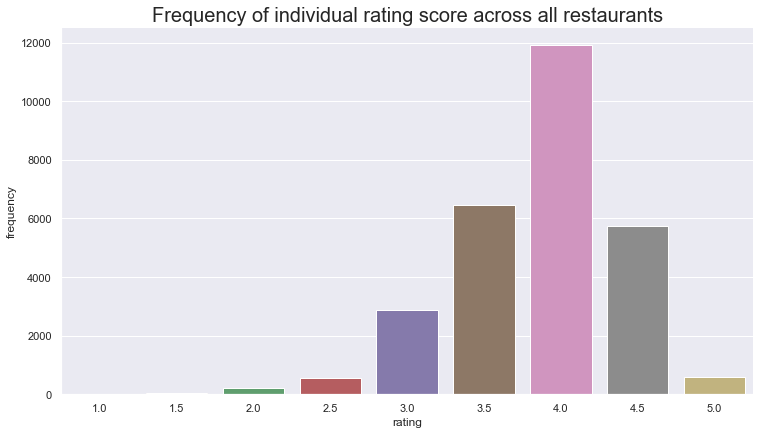

In [55]:
sns.catplot(x='rating', y='frequency', data=freq_df, kind='bar', height=6, aspect=1.8);
plt.title('Frequency of individual rating score across all restaurants', fontsize=20);

## Geographic Visualisations

In [60]:
!pip install geopandas

notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
!pip install descartes

notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import geopandas as gpd

In [3]:
gb = gpd.read_file('../../geo_data/PostalArea.shp')
gb_dists = gpd.read_file('../../geo_data/PostalDistrict.shp')
gb_sects = gpd.read_file('../../geo_data/PostalSector.shp')

In [4]:
#An alternative shape file located which may have more detailed postal code polygons
edinburgh = gpd.read_file('../../edinburgh/edin_postcodes/FrozenPostcode2011GridReferences.shp')

In [56]:
gb.head()

AreaID PostArea    AreaName  PCCnt    RefPC       x       y      Sprawl  \
0       1       AB    Aberdeen  16591  AB510JY  380801  823302    Aberdeen   
1       2       AL   St Albans   7764   AL49HQ  518400  210241   St Albans   
2       3        B  Birmingham  41503   B120UF  407660  285144  Birmingham   
3       4       BA        Bath  14838  BA113RD  370585  147293        Bath   
4       5       BB   Blackburn  13036   BB55US  377550  432035   Blackburn   

                                            geometry  
0  MULTIPOLYGON (((414084.362 845858.375, 414080....  
1  POLYGON ((528615.681 207505.032, 528610.750 20...  
2  POLYGON ((430268.493 309809.457, 430215.263 30...  
3  POLYGON ((403898.512 140274.626, 403595.910 14...  
4  POLYGON ((397131.543 438071.073, 397124.073 43...

In [57]:
edin_shape = gb.loc[gb['AreaName']=='Edinburgh']
edin_shape.head()

AreaID PostArea   AreaName  PCCnt    RefPC       x       y     Sprawl  \
32      34       EH  Edinburgh  23831  EH105LG  323354  670686  Edinburgh   

                                             geometry  
32  MULTIPOLYGON (((375449.729 673903.686, 375402....

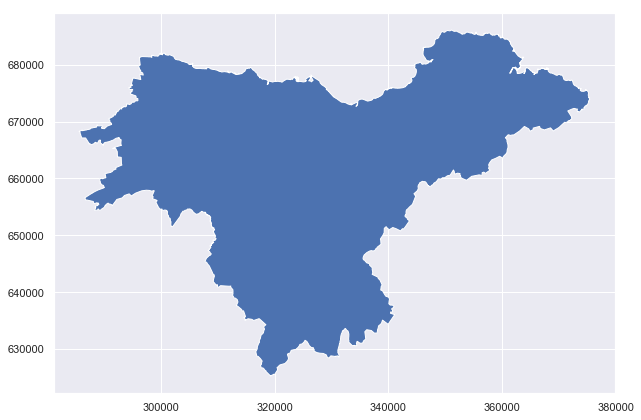

In [58]:
edin_shape.plot()


In [59]:
gb_dists.head(2)

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x       y  \
0       1     AB10       AB      10    725        2  AB106HA  392949  805109   
1       2     AB11       AB      11    660        1  AB115QH  394404  805438   

     Sprawl Locale                                           geometry  
0  Aberdeen   None  POLYGON ((392500.960 805927.935, 392536.991 80...  
1  Aberdeen   None  MULTIPOLYGON (((397283.458 805385.540, 397279....

In [60]:
gb_sects.head(2)

SectID  RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
0       1  AB10 1  AB10 1   AB101     AB10       AB      10       1    266   
1       2  AB10 6  AB10 6   AB106     AB10       AB      10       6    243   

   AnomCnt    RefPC       x       y    Sprawl Locale  \
0        0  AB101TH  393574  806073  Aberdeen   None   
1        3  AB106PS  392796  805097  Aberdeen   None   

                                            geometry  
0  POLYGON ((392500.960 805927.935, 392536.991 80...  
1  POLYGON ((391878.013 804752.011, 391878.203 80...

In [61]:
edin_dists = gb_dists.loc[gb_dists['Sprawl']=='Edinburgh']
edin_dists.head(2)

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
688     689      EH1       EH       1    326        0   EH11BL  325688   
689     690     EH10       EH      10    866        0  EH106EW  324424   

          y     Sprawl       Locale  \
688  673712  Edinburgh     Old Town   
689  670314  Edinburgh  Morningside   

                                              geometry  
688  POLYGON ((324508.097 673513.308, 324552.200 67...  
689  POLYGON ((323985.987 669321.038, 323968.977 66...

In [62]:
edin_dists.shape

(17, 12)

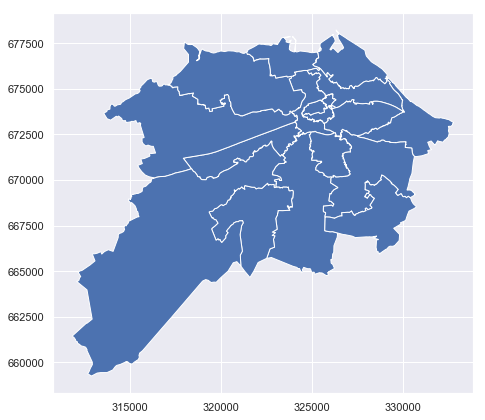

In [63]:
edin_dists.plot()

In [64]:
edin_sects = gb_sects.loc[gb_sects['Sprawl']=='Edinburgh']
edin_sects.head(10)

SectID RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
2491    2492  EH1 1  EH 1 1    EH11      EH1       EH       1       1    131   
2492    2493  EH1 2  EH 1 2    EH12      EH1       EH       1       2    106   
2493    2494  EH1 3  EH 1 3    EH13      EH1       EH       1       3     89   
2494    2495  EH2 1  EH 2 1    EH21      EH2       EH       2       1     61   
2495    2496  EH2 2  EH 2 2    EH22      EH2       EH       2       2     65   
2496    2497  EH2 3  EH 2 3    EH23      EH2       EH       2       3     40   
2497    2498  EH2 4  EH 2 4    EH24      EH2       EH       2       4     70   
2498    2499  EH3 5  EH 3 5    EH35      EH3       EH       3       5    168   
2499    2500  EH3 6  EH 3 6    EH36      EH3       EH       3       6    173   
2500    2501  EH3 7  EH 3 7    EH37      EH3       EH       3       7     81   

      AnomCnt   RefPC       x       y     Sprawl       Locale  \
2491        0  EH11QY  325885  673554  Edinburgh     Old Town   
2492        0  EH12NH  325294  673408  Edinburgh     Old Town   
2493        0  EH13JU  325930  674432  Edinburgh     New Town   
2494        0  EH21DJ  325328  674161  Edinburgh     New Town   
2495        0  EH22QA  325398  673955  Edinburgh     New Town   
2496        0  EH23ES  325014  673967  Edinburgh     New Town   
2497        0  EH24ET  324712  673765  Edinburgh     New Town   
2498        0  EH35NP  324925  675091  Edinburgh  Stockbridge   
2499        0  EH36JL  325108  674414  Edinburgh     New Town   
2500        0  EH37JA  324302  673667  Edinburgh     West End   

                                               geometry  
2491  POLYGON ((325519.956 673396.941, 325530.954 67...  
2492  POLYGON ((324508.097 673513.308, 324552.200 67...  
2493  POLYGON ((325557.998 674358.986, 325572.988 67...  
2494  POLYGON ((325557.998 674358.986, 325571.965 67...  
2495  POLYGON ((324990.969 673757.998, 324999.948 67...  
2496  POLYGON ((324898.962 674087.994, 324925.957 67...  
2497  POLYGON ((324583.976 673844.023, 324580.093 67...  
2498  POLYGON ((323865.007 675690.035, 323999.970 67...  
2499  POLYGON ((324378.979 674021.942, 324388.948 67...  
2500  POLYGON ((323909.002 673708.042, 323946.006 67...

In [65]:
edin_sects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 66 entries, 2491 to 2558
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SectID    66 non-null     int64   
 1   RMSect    66 non-null     object  
 2   GISSect   66 non-null     object  
 3   StrSect   66 non-null     object  
 4   PostDist  66 non-null     object  
 5   PostArea  66 non-null     object  
 6   DistNum   66 non-null     object  
 7   SecNum    66 non-null     int64   
 8   PCCnt     66 non-null     int64   
 9   AnomCnt   66 non-null     int64   
 10  RefPC     66 non-null     object  
 11  x         66 non-null     int64   
 12  y         66 non-null     int64   
 13  Sprawl    66 non-null     object  
 14  Locale    65 non-null     object  
 15  geometry  66 non-null     geometry
dtypes: geometry(1), int64(6), object(9)
memory usage: 8.8+ KB


In [66]:
edin_sects.RefPC.nunique() #So we have only unique postcodes within our edin_sects dataset. 

66

In [67]:
edin_sects.Locale.nunique()

33

In [68]:
edin_sects.RefPC.unique()

array(['EH11QY', 'EH12NH', 'EH13JU', 'EH21DJ', 'EH22QA', 'EH23ES',
       'EH24ET', 'EH35NP', 'EH36JL', 'EH37JA', 'EH38AQ', 'EH39JR',
       'EH41EJ', 'EH42NG', 'EH43JH', 'EH44QR', 'EH45PA', 'EH46DF',
       'EH47DU', 'EH48BJ', 'EH51PB', 'EH52JB', 'EH53JT', 'EH64QP',
       'EH65NZ', 'EH66HB', 'EH67JG', 'EH68FE', 'EH74JX', 'EH75PJ',
       'EH76JH', 'EH87JA', 'EH88DU', 'EH89HG', 'EH91UE', 'EH92EG',
       'EH93BW', 'EH104DW', 'EH105LT', 'EH106JL', 'EH107BW', 'EH111BN',
       'EH112LT', 'EH113QD', 'EH114NT', 'EH125PT', 'EH126JD', 'EH127JY',
       'EH128BN', 'EH129DQ', 'EH130DS', 'EH139BW', 'EH141LJ', 'EH142QR',
       'EH143BS', 'EH145LJ', 'EH146AH', 'EH147EG', 'EH151NB', 'EH152JA',
       'EH153LL', 'EH164ED', 'EH165XG', 'EH166JU', 'EH177HE', 'EH178HU'],
      dtype=object)

In [69]:
edin_sects.shape

(66, 16)

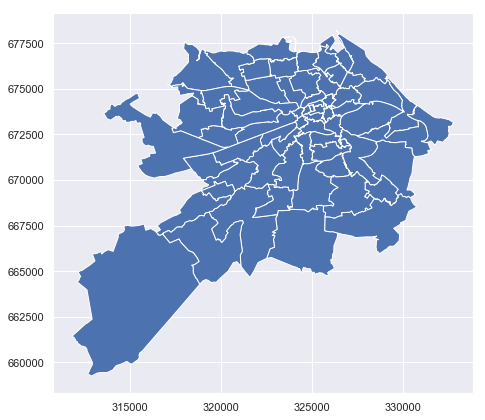

In [70]:
edin_sects.plot()

## Create Heat Maps to illustrate quantity and best_rated restaurants in an area

1. Create a dataframe that cam link postcode and restaurant count in that area

2. Create a datafram that can link postcode and average restaurant rating in that area

In [71]:
post_code = edin_sects.loc[edin_sects['RefPC']=='EH12NH'] #test we can access and plot indidual post code shapes. 
post_code

SectID RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
2492    2493  EH1 2  EH 1 2    EH12      EH1       EH       1       2    106   

      AnomCnt   RefPC       x       y     Sprawl    Locale  \
2492        0  EH12NH  325294  673408  Edinburgh  Old Town   

                                               geometry  
2492  POLYGON ((324508.097 673513.308, 324552.200 67...

In [72]:
post_code_2 = edin_sects.loc[edin_sects['RefPC'].str.contains('EH8')] #test we can access and plot indidual post code shapes. 
post_code_2

SectID RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
2522    2523  EH8 7  EH 8 7    EH87      EH8       EH       8       7    232   
2523    2524  EH8 8  EH 8 8    EH88      EH8       EH       8       8    115   
2524    2525  EH8 9  EH 8 9    EH89      EH8       EH       8       9    213   

      AnomCnt   RefPC       x       y     Sprawl      Locale  \
2522        0  EH87JA  328764  673717  Edinburgh  Meadowbank   
2523        0  EH88DU  326815  673918  Edinburgh    Old Town   
2524        0  EH89HG  326267  672915  Edinburgh    Old Town   

                                               geometry  
2522  POLYGON ((326660.981 673504.950, 326729.003 67...  
2523  POLYGON ((326328.928 673975.166, 326334.955 67...  
2524  POLYGON ((325700.976 673120.960, 325747.956 67...

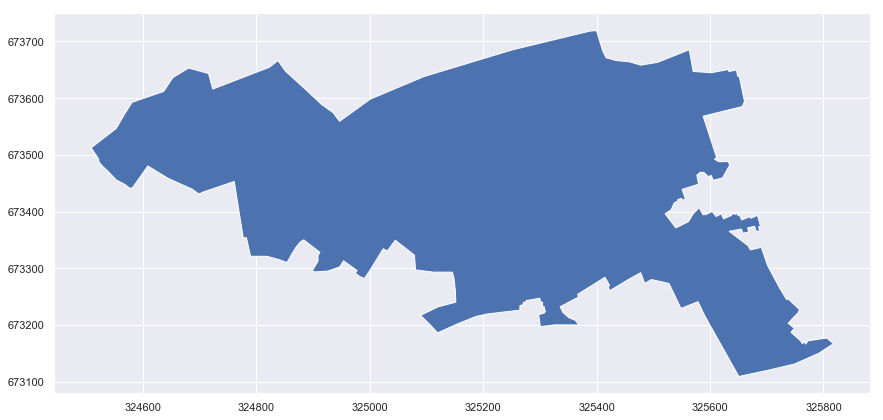

In [73]:
post_code.plot()

1. 
We want the business dataframe filtered for edinburgh and restaurants as previously executed. (Except we have reinitiated here as our previous set was infected with restaurants from mEDINa!)

In [74]:
edin_pc = df_biz[df_biz['city'].str.contains('Edinburgh', case=False, na=False)]
# edin = df_biz[df_biz.city.str.contains('Edin',case=False, na=False)]
print(edin_pc.shape)
edin_pc.head()

(3873, 12)


business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
214  KbSoYXHUz_Bjo-v0VWHDrw  "St. Andrew Square"   
353  3gM8zh_OaubYXNnQNxAYKQ           "Planet X"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A     "The Rendezvous"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
214                   "St Andrew Sq"  Edinburgh   EDH       EH1 1  55.953860   
353          "74 South Clerk Street"  Edinburgh   EDH         EH8  55.939643   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
214  -3.191788    4.5            14        1   
353  -3.180275    2.5             3        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
214                     Active Life;Parks;Local Flavor  
353  Sports Wear;Sporting Goods;Shopping;Bikes;Fashion  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese

In [75]:
edin_rest_pc = edin_pc[edin_pc.categories.str.contains('Rest', case=False, na=False)]
print(edin_rest_pc.shape)
edin_rest_pc.head(2)

(1504, 12)


business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

In [76]:
#Let's check how many unique postcodes we've got in the restaurant set
edin_rest_pc.postal_code.nunique()

748

In [77]:
edin_rest_pc.postal_code.unique()

array(['EH3 5HA', 'EH1 1EE', 'EH2 4PG', 'EH3 9BE', 'EH2 2NH', 'EH6 6JJ',
       'EH1 2QN', 'EH7 4EB', 'EH3 7NG', 'EH2 4SH', 'EH11 1BY', 'EH2 4JZ',
       'EH10 7AZ', 'EH1 3NH', 'EH1 1QS', 'EH5 1PD', 'EH6 8', 'EH2 4NF',
       'EH1 3SA', 'EH10 4QJ', 'EH1 2HS', 'EH1 1DH', 'EH9 1JJ', 'EH6 6QN',
       'EH6 8SA', 'EH3 5AL', 'EH15 2AN', 'EH7 5AP', 'EH3 9AZ', 'EH3 7LW',
       'EH9 1QE', 'EH7 4BN', 'EH1 1EN', 'EH3 8EA', 'EH2 1EL', 'EH6 6SH',
       'EH1 1SX', 'EH8 9JB', 'EH1 2QH', 'EH6 4PG', 'EH3 5LF', 'EH9 1QW',
       'EH1 1BQ', 'EH1 3RJ', 'EH1 2JU', 'EH15 1LH', 'EH2 2AA', 'EH2 2',
       'EH7 4AA', 'EH8 9DB', 'EH7 5JU', 'EH8 8BQ', 'EH2 2DL', 'EH2 1HJ',
       'EH16 5AD', 'EH10 4HP', 'EH3 5AN', 'EH15 3RH', 'EH2 3', 'EH6 6LX',
       'EH1 1AD', 'EH2 1LH', 'EH8 9ET', 'EH2 2BD', 'EH3 9', 'EH3 7TH',
       'EH1 2LP', 'EH9 1JT', 'EH9 1PY', 'EH9 1QR', 'EH12 9DJ', 'KY13 0QJ',
       'EH1 3SB', 'EH14 2EZ', 'EH8 9BX', 'EH1 2ED', 'EH6 5', 'EH6 5BX',
       'EH7 4NY', 'EH1 2PB', 'EH1 3RH', 'EH7 4AF',

In [78]:
postal_c = edin_rest_pc.loc[edin_rest_pc['postal_code'].str.contains('EH8', na=False)] #test we can access and plot indidual post code shapes. 
print(postal_c.nunique(), postal_c.postal_code.unique())

business_id     173
name            171
address         157
city              1
state             2
postal_code      77
latitude        161
longitude       162
stars             6
review_count     46
is_open           2
categories      151
dtype: int64 ['EH8 9JB' 'EH8 9DB' 'EH8 8BQ' 'EH8 9ET' 'EH8 9BX' 'EH8 9DH' 'EH8 9AA'
 'EH8 9BZ' 'EH8 9JD' 'EH8 8AA' 'EH8 9NE' 'EH8 9JN' 'EH8 9' 'EH8 8AU'
 'EH8 9PT' 'EH8 9EH' 'EH8 9ER' 'EH8 9LS' 'EH8 9EF' 'EH8 9EZ' 'EH8 9AL'
 'EH8 8DD' 'EH8 9TU' 'EH8 9JQ' 'EH8 9BJ' 'EH8 9TX' 'EH8 9JG' 'EH8 9AJ'
 'EH8 9HX' 'EH8 9TT' 'EH8 7RU' 'EH8 8FS' 'EH8 9PS' 'EH8 9AY' 'EH8 9PR'
 'EH8' 'EH8 9BT' 'EH8 9NZ' 'EH8 9BH' 'EH8 9DD' 'EH8 9DZ' 'EH8 9QY'
 'EH8 9PZ' 'EH8 9NG' 'EH8 8BZ' 'EH8 8' 'EH8 8BS' 'EH8 7AD' 'EH8 9EA'
 'EH8 9DA' 'EH8 9LP' 'EH8 9JH' 'EH8 9FT' 'EH8 8AB' 'EH8 7RW' 'EH8 9NH'
 'EH8 8DL' 'EH8 8DQ' 'EH8 9JP' 'EH8 7AW' 'EH8 9DT' 'EH8 9QN' 'EH8 9SH'
 'EH8 9NQ' 'EH8 9BY' 'EH8 9TG' 'EH8 8AE' 'EH8 8AF' 'EH8 9HL' 'EH8 7NG'
 'EH8 9QR' 'EH8 9BU' 'EH8 9PY' 'EH8 9JW' 'EH8

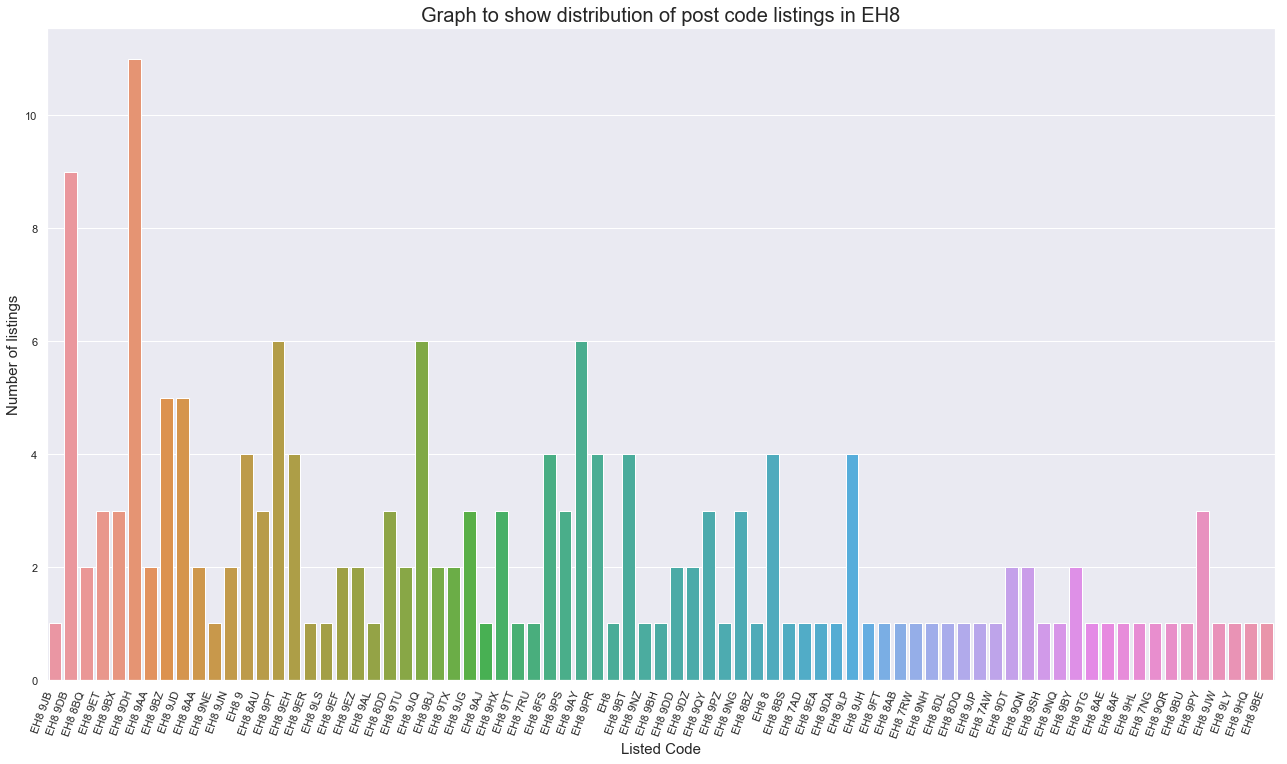

In [79]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (22,12)})
sns.countplot(x='postal_code', data=postal_c)#.set_title("Graph to show distribution of ratings")
plt.title('Graph to show distribution of post code listings in EH8', fontsize=20)
plt.ylabel('Number of listings', fontsize=15)
plt.xlabel('Listed Code', fontsize=15)
plt.xticks(rotation=70, ha='right');
plt.show()

We can see that most of the codes are fully formed but we have one 3character 'EH8' and five more 4 character'EH8 X'\
I don't really want to reduce the comparison to just the first three characters of a postcode but we also have the problem that we have 748 unique post codes in our business set but only 66 unique postcode/shape files. 


Let's investigate the less favourable option of just using the first part of a postcode to merge the data sets. To do this we'll have to create a new column in our edi_rest_pc dataframe that holds this information. As follows: 

In [80]:
edin_rest_pc['postal_area'] = edin_rest_pc.postal_code.str[:3]
print('There are {} unique postal areas in the business dataset'.format(edin_rest_pc.postal_area.nunique()))
print('The postal areas are: {}'.format(edin_rest_pc.postal_area.unique()))
edin_rest_pc.head(3)

There are 10 unique postal areas in the business dataset
The postal areas are: ['EH3' 'EH1' 'EH2' 'EH6' 'EH7' 'EH5' 'EH9' 'EH8' 'KY1' 'EH4' nan]


business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A     "The Rendezvous"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   

                                            categories postal_area  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...         EH3  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis         EH1  
397                      Restaurants;Cantonese;Chinese         EH2

We can see that there are som NaN values in the new postal area column. Let's check how many and if we can get rid of them. We also don't really want to keep the KY postcode as it's on the otherside of the river to Edinburgh so not really any good for our purposes. 

In [83]:
edin_rest_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 68 to 174527
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   1504 non-null   object 
 1   name          1504 non-null   object 
 2   address       1504 non-null   object 
 3   city          1504 non-null   object 
 4   state         1504 non-null   object 
 5   postal_code   1502 non-null   object 
 6   latitude      1504 non-null   float64
 7   longitude     1504 non-null   float64
 8   stars         1504 non-null   float64
 9   review_count  1504 non-null   int64  
 10  is_open       1504 non-null   int64  
 11  categories    1504 non-null   object 
 12  postal_area   1502 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 164.5+ KB


In [85]:
edin_rest_pc.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     2
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
postal_area     2
dtype: int64

In [96]:
edin_rest_pc.dropna(inplace=True)

In [88]:
#Let's check into how many times the KY1 postcode occurs?
ky1_count = edin_rest_pc.postal_area.value_counts()['KY1']

In [90]:
ky1_count #Only 2 so let's also drop these rows. 

2

In [97]:
edin_rest_pc = edin_rest_pc[edin_rest_pc.postal_area != 'KY1']
print('The postal areas are: {}'.format(edin_rest_pc.postal_area.unique()))

The postal areas are: ['EH3' 'EH1' 'EH2' 'EH6' 'EH7' 'EH5' 'EH9' 'EH8' 'EH4']


Cool! We now have only valid postcodes even if it's not the full set of codes that we'd like to be working with

So we now need to join the edin_sects (col=PostDist) dataframe to the edn_rest_pc (col=postal_area) dataframe. Let's reduce the 2 sets down into the minimum required cols so they're easy to work with. 

In [140]:
#Create the first df from our business dataframe
dfx = edin_rest_pc[['business_id', 'name', 'latitude', 'longitude', 'postal_area', 'stars', 'review_count']]
dfx.head()

business_id                   name   latitude  longitude  \
68   F31RycVVooeIOp9jsXmg6g    "The Bluebird Cafe"  55.962444  -3.197662   
380  inaACfObL1NBNJmBG11iuQ          "Global Deli"  55.947960  -3.192143   
397  Di5ApLgoQpcv5Aew82fI_A       "The Rendezvous"  55.950550  -3.209454   
420  OvbLKXkJCg8ZMHX9L5faIA    "Bread Meats Bread"  55.946390  -3.205829   
446  T2jfXhvQPk9wLdt1OVV-Kg  "Rose Street Brewery"  55.952835  -3.198560   

    postal_area  stars  review_count  
68          EH3    4.5            16  
380         EH1    4.0            13  
397         EH2    3.5            19  
420         EH3    4.0            28  
446         EH2    3.0            24

In [141]:
dfx.shape

(1500, 7)

In [142]:
dfx.nunique()

business_id     1500
name            1400
latitude        1384
longitude       1386
postal_area        9
stars              9
review_count     100
dtype: int64

In [240]:
#Create the second df from our Districts shapefile dataframe
edin_dists.head()

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
688     689      EH1       EH       1    326        0   EH11BL  325688   
689     690     EH10       EH      10    866        0  EH106EW  324424   
690     691     EH11       EH      11    932        0  EH113HT  321777   
691     692     EH12       EH      12   1332        0  EH126NR  320396   
692     693     EH13       EH      13    370        0  EH130AF  322383   

          y     Sprawl         Locale  \
688  673712  Edinburgh       Old Town   
689  670314  Edinburgh    Morningside   
690  671790  Edinburgh  Wester Hailes   
691  672805  Edinburgh    Costorphine   
692  668883  Edinburgh       Colinton   

                                              geometry  
688  POLYGON ((324508.097 673513.308, 324552.200 67...  
689  POLYGON ((323985.987 669321.038, 323968.977 66...  
690  POLYGON ((324111.963 673254.942, 324111.979 67...  
691  POLYGON ((313576.985 673670.943, 313747.995 67...  
692  POLYGON ((323056.974 669609.006, 323096.988 66...

In [242]:
#This dataframe is appropriate as it contains the district shapefiles that we are interested in
edin_dists.PostDist.unique() 

array(['EH1', 'EH10', 'EH11', 'EH12', 'EH13', 'EH14', 'EH15', 'EH16',
       'EH17', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9'],
      dtype=object)

In [248]:
edin_dists.PostDist.value_counts()

EH5     1
EH14    1
EH6     1
EH16    1
EH1     1
EH9     1
EH17    1
EH11    1
EH2     1
EH8     1
EH15    1
EH12    1
EH4     1
EH10    1
EH3     1
EH13    1
EH7     1
Name: PostDist, dtype: int64

In [243]:
dfy = edin_dists[['DistID', 'PostDist', 'Locale', 'geometry', 'x', 'y']]
dfy.head()

DistID PostDist         Locale  \
688     689      EH1       Old Town   
689     690     EH10    Morningside   
690     691     EH11  Wester Hailes   
691     692     EH12    Costorphine   
692     693     EH13       Colinton   

                                              geometry       x       y  
688  POLYGON ((324508.097 673513.308, 324552.200 67...  325688  673712  
689  POLYGON ((323985.987 669321.038, 323968.977 66...  324424  670314  
690  POLYGON ((324111.963 673254.942, 324111.979 67...  321777  671790  
691  POLYGON ((313576.985 673670.943, 313747.995 67...  320396  672805  
692  POLYGON ((323056.974 669609.006, 323096.988 66...  322383  668883

In [247]:
geo_df = dfy.merge(dfx, how='left', left_on='PostDist', right_on='postal_area')
print(geo_df.shape) #We have 8 more records than unique businesses!! we need to remove some rows. 
geo_df.tail(50)

(1508, 13)


DistID PostDist     Locale  \
1458     742      EH9  Newington   
1459     742      EH9  Newington   
1460     742      EH9  Newington   
1461     742      EH9  Newington   
1462     742      EH9  Newington   
1463     742      EH9  Newington   
1464     742      EH9  Newington   
1465     742      EH9  Newington   
1466     742      EH9  Newington   
1467     742      EH9  Newington   
1468     742      EH9  Newington   
1469     742      EH9  Newington   
1470     742      EH9  Newington   
1471     742      EH9  Newington   
1472     742      EH9  Newington   
1473     742      EH9  Newington   
1474     742      EH9  Newington   
1475     742      EH9  Newington   
1476     742      EH9  Newington   
1477     742      EH9  Newington   
1478     742      EH9  Newington   
1479     742      EH9  Newington   
1480     742      EH9  Newington   
1481     742      EH9  Newington   
1482     742      EH9  Newington   
1483     742      EH9  Newington   
1484     742      EH9  Newington   
1485     742      EH9  Newington   
1486     742      EH9  Newington   
1487     742      EH9  Newington   
1488     742      EH9  Newington   
1489     742      EH9  Newington   
1490     742      EH9  Newington   
1491     742      EH9  Newington   
1492     742      EH9  Newington   
1493     742      EH9  Newington   
1494     742      EH9  Newington   
1495     742      EH9  Newington   
1496     742      EH9  Newington   
1497     742      EH9  Newington   
1498     742      EH9  Newington   
1499     742      EH9  Newington   
1500     742      EH9  Newington   
1501     742      EH9  Newington   
1502     742      EH9  Newington   
1503     742      EH9  Newington   
1504     742      EH9  Newington   
1505     742      EH9  Newington   
1506     742      EH9  Newington   
1507     742      EH9  Newington   

                                               geometry       x       y  \
1458  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1459  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1460  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1461  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1462  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1463  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1464  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1465  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1466  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1467  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1468  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1469  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1470  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1471  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1472  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1473  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1474  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1475  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1476  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1477  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1478  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1479  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1480  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1481  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1482  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1483  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1484  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  671722   
1485  POLYGON ((324946.973 672625.952, 324998.200 67...  326006  6717

Actually, on a second look we can see that the extra rows are just the polygon rows that we don't have any restaurant data for. We should still include them to complete the picture as we currently understand it and to give a true reflection of the data we have at our disposal. 

In [245]:
#First let's remove the nulls which correspond to postal sectors with no business in them. 
geo_df.isna().sum() 

DistID          0
PostDist        0
Locale          0
geometry        0
x               0
y               0
business_id     8
name            8
latitude        8
longitude       8
postal_area     8
stars           8
review_count    8
dtype: int64

In [253]:
# geo_df.dropna(inplace=True)
# geo_df.shape 
geo_df.fillna(0, inplace=True)
print(geo_df.isna().sum()) #Nans replaced with zeros to keep the rows in the set. 
geo_df.shape

DistID          0
PostDist        0
Locale          0
geometry        0
x               0
y               0
business_id     0
name            0
latitude        0
longitude       0
postal_area     0
stars           0
review_count    0
dtype: int64


(1508, 13)

In [254]:
#Let's look for duplicated business id's
# geo_df.pivot_table(index=['business_id'], aggfunc='size') #Yes there are duplicates so we'll need to remove them

In [255]:
# geo_df.duplicated(subset='business_id', keep='first').sum() #4115 - that is the exact amount we need to remove!

In [227]:
# geo_df.drop_duplicates(subset='business_id', keep='first', inplace=True)

In [256]:
# print(geo_df.shape, geo_df.business_id.nunique()) #Great we now have 1500 records and 1500 unique ids as required. 
# geo_df.head(2)

### Creat heat map by restaurant quantity. 

We want to count how many restaurants their are in each postal area and then create a heat map by postal_area based on these counts. 

In [257]:
qty_df = geo_df[['postal_area', 'latitude', 'longitude', 'geometry']]
qty_df['counter'] = 1

qty_df = qty_df.groupby(['postal_area'])['counter'].sum().to_frame().reset_index()

In [258]:
qty_df.head(10)

postal_area  counter
0           0        8
1         EH1      595
2         EH2      197
3         EH3      232
4         EH4       40
5         EH5        4
6         EH6      127
7         EH7       73
8         EH8      173
9         EH9       59

So grouping by polygons is tricky so we'll hack around this by dropping all duplicate postal areas in our geo_df dataframe and then joining our qty_df to it to get a single dataframe.

In [261]:
geo_dropped = geo_df.drop_duplicates(subset='postal_area', keep='first').reset_index()
print(geo_dropped.shape) #We now have 9 rows as expected and we can join to qty_df. 
geo_dropped.head(2) 

(10, 14)


index  DistID PostDist       Locale  \
0      0     689      EH1     Old Town   
1    595     690     EH10  Morningside   

                                            geometry       x       y  \
0  POLYGON ((324508.097 673513.308, 324552.200 67...  325688  673712   
1  POLYGON ((323985.987 669321.038, 323968.977 66...  324424  670314   

              business_id           name  latitude  longitude postal_area  \
0  inaACfObL1NBNJmBG11iuQ  "Global Deli"  55.94796  -3.192143         EH1   
1                       0              0   0.00000   0.000000           0   

   stars  review_count  
0    4.0          13.0  
1    0.0           0.0

Our indices at 0 and 1 have switched places which does not suit our merge requirements. We need to swap the rows around before we move on. 

In [262]:
b, c = geo_dropped.iloc[0].copy(), geo_dropped.iloc[1].copy() #create a copy of each row
geo_dropped.iloc[0], geo_dropped.iloc[1] = c, b # send the required row to the required location in the main df. 

In [264]:
geo_dropped.head(2) #Great that worked our indices are now as required. 

index  DistID PostDist       Locale  \
0    595     690     EH10  Morningside   
1      0     689      EH1     Old Town   

                                            geometry       x       y  \
0  POLYGON ((323985.987 669321.038, 323968.977 66...  324424  670314   
1  POLYGON ((324508.097 673513.308, 324552.200 67...  325688  673712   

              business_id           name  latitude  longitude postal_area  \
0                       0              0   0.00000   0.000000           0   
1  inaACfObL1NBNJmBG11iuQ  "Global Deli"  55.94796  -3.192143         EH1   

   stars  review_count  
0    0.0           0.0  
1    4.0          13.0

In [265]:
#Now we'll merge the two dataframes to give us a restaurant count for each postal area
geo_merged = pd.merge(geo_dropped, qty_df, left_index=True, right_index=True)
geo_merged.head() #Finally the final dataframe is completed and we can look to plot a heat map!

index  DistID PostDist       Locale  \
0    595     690     EH10  Morningside   
1      0     689      EH1     Old Town   
2    603     700      EH2     New Town   
3    800     711      EH3     New Town   
4   1032     722      EH4   Craigleith   

                                            geometry       x       y  \
0  POLYGON ((323985.987 669321.038, 323968.977 66...  324424  670314   
1  POLYGON ((324508.097 673513.308, 324552.200 67...  325688  673712   
2  POLYGON ((325557.998 674358.986, 325571.965 67...  325167  673961   
3  POLYGON ((323865.007 675690.035, 323999.970 67...  324794  674110   
4  POLYGON ((317090.964 675219.990, 317099.975 67...  321358  675105   

              business_id                  name   latitude  longitude  \
0                       0                     0   0.000000   0.000000   
1  inaACfObL1NBNJmBG11iuQ         "Global Deli"  55.947960  -3.192143   
2  Di5ApLgoQpcv5Aew82fI_A      "The Rendezvous"  55.950550  -3.209454   
3  F31RycVVooeIOp9jsXmg6g   "The Bluebird Cafe"  55.962444  -3.197662   
4  yRK1t7q3cWDKrl14D_JuOA  "Cramond Falls Cafe"  55.975103  -3.303243   

  postal_area_x  stars  review_count postal_area_y  counter  
0             0    0.0           0.0             0        8  
1           EH1    4.0          13.0           EH1      595  
2           EH2    3.5          19.0           EH2      197  
3           EH3    4.5          16.0           EH3      232  
4           EH4    3.5           7.0           EH4       40

Plot A Heatmap:

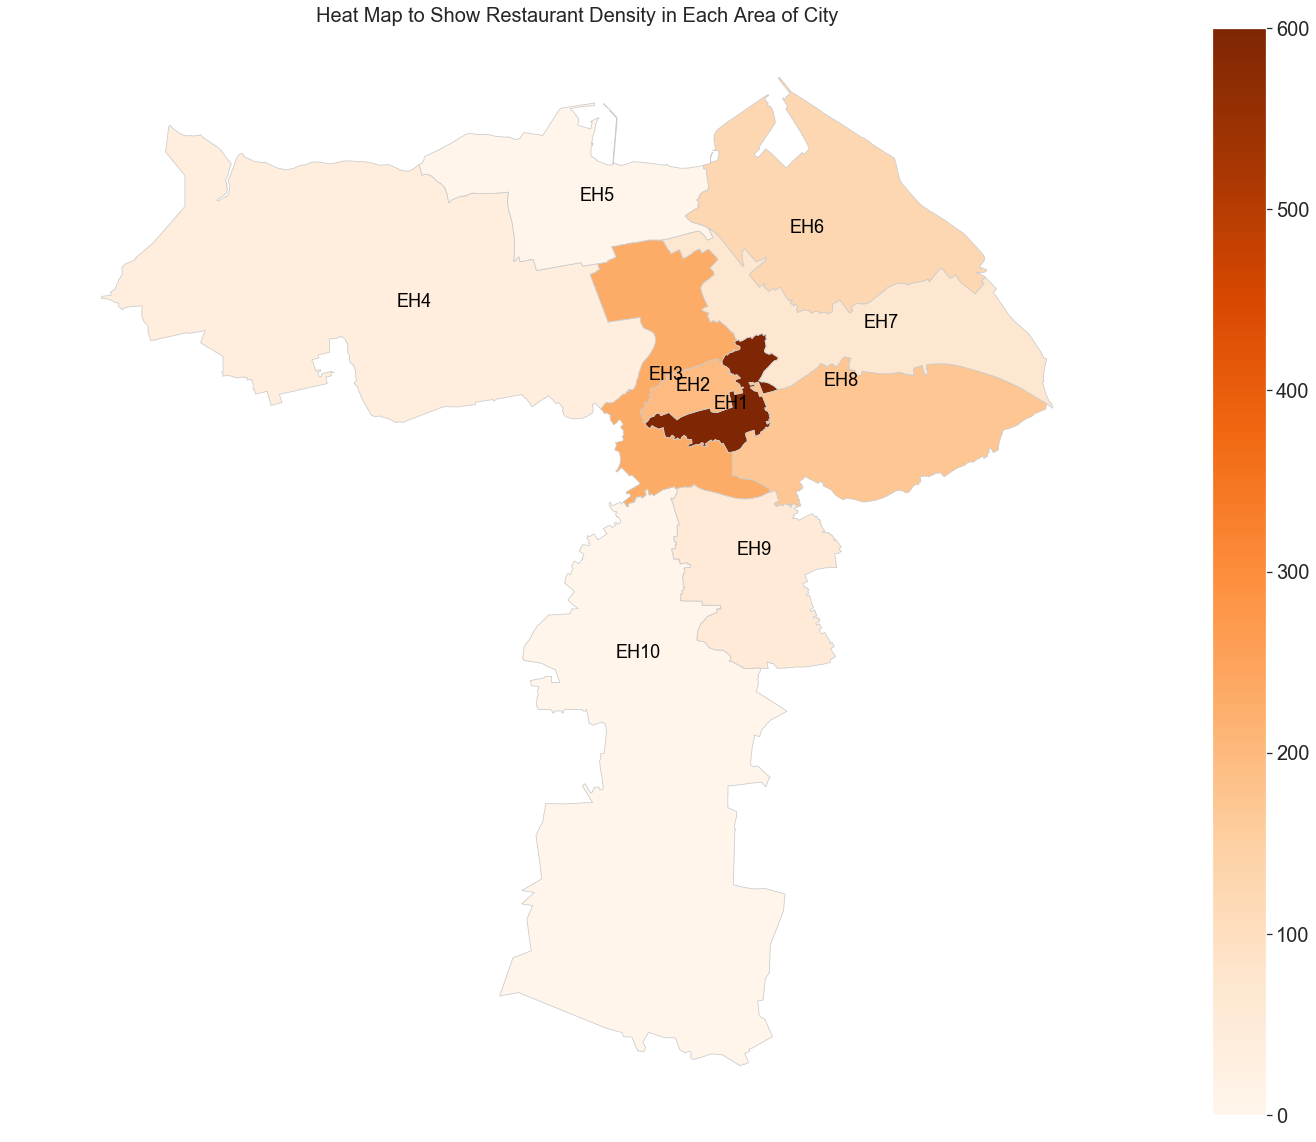

In [274]:
fig, ax = plt.subplots(1, figsize=(40,20))
ax.axis('off')
ax.set_title('Heat Map to Show Restaurant Density in Each Area of City', fontsize=20);

color = 'Oranges'
vmin, vmax = 0, 600
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

geo_merged.plot('counter', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in geo_merged.iterrows():
    if(row['counter']>0):
        plt.annotate(s=row['PostDist'], xy=(row['x'], row['y']),
                    horizontalalignment='center', fontsize=18, color='black', wrap=True)
        
        
# plt.show()

______________________________________________________________________________________________________________________

## Category Data Exploration

In [378]:
cat_df=edin_rest

In [379]:
cat_df['categories'].isnull().sum()

0

In [380]:
cat_df.head()

business_id                   name  \
68   F31RycVVooeIOp9jsXmg6g    "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ          "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A       "The Rendezvous"   
420  OvbLKXkJCg8ZMHX9L5faIA    "Bread Meats Bread"   
446  T2jfXhvQPk9wLdt1OVV-Kg  "Rose Street Brewery"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   
420                "92 Lothian Road"  Edinburgh   EDH     EH3 9BE  55.946390   
446              "55-57 Rose Street"  Edinburgh   EDH     EH2 2NH  55.952835   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   
420  -3.205829    4.0            28        1   
446  -3.198560    3.0            24        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese  
420                                Burgers;Restaurants  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...

In [381]:
cat_df['categories'].nunique()

1045

In [382]:
cat_df['categories'].str.strip()

68        Breakfast & Brunch;Diners;Restaurants;Cafes;Br...
380          Restaurants;Food;Sandwiches;Coffee & Tea;Delis
397                           Restaurants;Cantonese;Chinese
420                                     Burgers;Restaurants
446       Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...
                                ...                        
174207                          Seafood;Italian;Restaurants
174244                         Moroccan;African;Restaurants
174310                Sushi Bars;Japanese;Restaurants;Ramen
174348                                  Italian;Restaurants
174527      Cafes;Local Flavor;Scottish;Restaurants;British
Name: categories, Length: 1605, dtype: object

In [383]:
cat_df['categories'] = cat_df.categories.map(lambda x: [i.strip() for i in sorted(x.split(';'))])
print(cat_df['categories'].map(tuple).nunique())


745


In [346]:
cat_df['num_keywords'] = cat_df['categories'].str.len()
cat_df[['categories', 'num_keywords']].sort_values('num_keywords', ascending=False).head()

categories  num_keywords
168703  [Bakeries, Breakfast & Brunch, Drugstores, Flo...            13
129887  [Active Life, American (Traditional), Bars, Be...            12
169666  [Arts & Entertainment, Bars, Coffee & Tea, Dan...            11
174042  [Bakeries, British, Cafes, Chocolatiers & Shop...            11
99404   [Arts & Entertainment, Bars, Beer, British, Fo...            11

In [ ]:
#Create a function that returns a visual and a dataframe of the most commonly occuring tuples within the categories 
#column. 

In [420]:
cat_df['categories'].map(tuple).to_frame()
# res_list = [i[0] for i in jim ]
# res_list

categories
68      (Breakfast & Brunch, British, Cafes, Diners, R...
380     (Coffee & Tea, Delis, Food, Restaurants, Sandw...
397                     (Cantonese, Chinese, Restaurants)
420                                (Burgers, Restaurants)
446     (Bars, Breakfast & Brunch, Nightlife, Pubs, Re...
...                                                   ...
174207                    (Italian, Restaurants, Seafood)
174244                   (African, Moroccan, Restaurants)
174310         (Japanese, Ramen, Restaurants, Sushi Bars)
174348                             (Italian, Restaurants)
174527  (British, Cafes, Local Flavor, Restaurants, Sc...

[1605 rows x 1 columns]

In [398]:
df_a = pd.DataFrame(cat_df.groupby(cat_df['categories'].map(tuple))['review_count'].sum())


In [399]:
df_a.reset_index(level=0, inplace=True)
df_a.sort_values(['review_count'], ascending=False)

categories  review_count
688                             (Italian, Restaurants)           900
284   (Bars, Gastropubs, Nightlife, Pubs, Restaurants)           596
523                             (Chinese, Restaurants)           549
740                                (Restaurants, Thai)           392
666                              (French, Restaurants)           391
..                                                 ...           ...
355                   (Brasseries, Cafes, Restaurants)             3
1    (Active Life, American (Traditional), Bars, Be...             3
399          (Breakfast & Brunch, Diners, Restaurants)             3
449                      (Burgers, Pizza, Restaurants)             3
372  (Breakfast & Brunch, British, Cafes, Fast Food...             3

[745 rows x 2 columns]

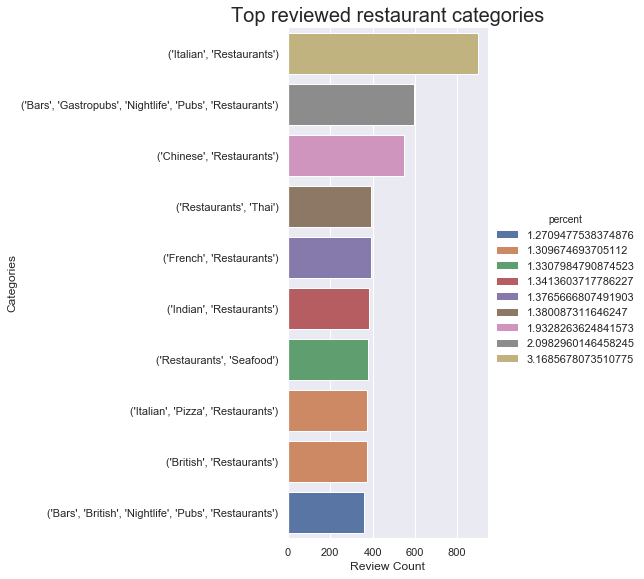

categories  review_count  \
688                            (Italian, Restaurants)           900   
284  (Bars, Gastropubs, Nightlife, Pubs, Restaurants)           596   
523                            (Chinese, Restaurants)           549   
740                               (Restaurants, Thai)           392   
666                             (French, Restaurants)           391   
683                             (Indian, Restaurants)           381   
729                            (Restaurants, Seafood)           378   
686                     (Italian, Pizza, Restaurants)           372   
429                            (British, Restaurants)           372   
220     (Bars, British, Nightlife, Pubs, Restaurants)           361   

     cum_review_count   percent  cum_percent  
688             24957  3.168568     3.168568  
284              9405  2.098296     5.266864  
523             17259  1.932826     7.199690  
740             28108  1.380087     8.579777  
666             22594  1.376567     9.956344  
683             23569  1.341360    11.297705  
729             27273  1.330798    12.628503  
686             24047  1.309675    13.938178  
429             14162  1.309675    15.247852  
220              7027  1.270948    16.518800

In [384]:

def common_comb(df):
    '''
    Function to show the most commonly reviewed keyword tuples / combinations from the business categories column. 
    
    '''
    df_x = pd.DataFrame(df.groupby(df['categories'].map(tuple))['review_count'].sum())
    df_x.reset_index(level=0, inplace=True)
    df_x['cum_review_count'] = df_x['review_count'].cumsum(axis=0)
    df_x['percent'] = (df_x['review_count']/df_x['review_count'].sum())*100
    df_x = df_x.sort_values(['percent'], ascending=0)
    df_x['cum_percent'] = df_bpc['percent'].cumsum(axis=0)
    df_x = df_x.sort_values(['percent'], ascending=0)
    
    sns.catplot(x='review_count', y='categories', data=df_x.head(10), kind='bar', 
           hue='percent', dodge=False, height=8,)
    plt.title('Top reviewed restaurant categories', fontsize=20)
    plt.xlabel('Review Count')
    plt.ylabel('Categories')
    plt.show()
    
    return df_x.head(10)

common_comb(cat_df)

What we'd like to do next is see the most commonly reviewed single words in the categories we need to figure out how to extract the words from the tuples... it may be more convenient to import a partially cleaned data set including individual rows for each review and then counting words based on occurence in each row. 

In [322]:
from collections import Counter

In [419]:
com_word = sum(cat_df.categories, [])
c = Counter(com_word)
c.most_common(10)


[('Restaurants', 1605),
 ('Food', 377),
 ('Nightlife', 275),
 ('Bars', 269),
 ('Coffee & Tea', 239),
 ('Fast Food', 237),
 ('British', 173),
 ('Cafes', 155),
 ('Italian', 149),
 ('Sandwiches', 135)]

In [418]:
top_words = [i[0] for i in c.most_common(25)]
top_words[0:5]

['Restaurants', 'Food', 'Nightlife', 'Bars', 'Coffee & Tea']

In [421]:
!ls

Data Cleaning.ipynb          User Data EDA.ipynb
Google Api Calls-Copy1.ipynb Yelp API Request.ipynb
Google Api Calls.ipynb       edinburgh_reviews.csv
Restaurant Data EDA.ipynb    nested_info.csv


In [422]:
edin_revs = pd.read_csv('edinburgh_reviews.csv')

In [423]:
edin_revs.head()

Unnamed: 0             business_id                 name       city  \
0        1900  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
1        1901  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
2        1903  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
3        1904  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
4        1907  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   

                                          categories               review_id  \
0  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  b31UZTy2TvnFtkfygJG40Q   
1  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  jYxWLyWrWy8dJFQs9DEuEg   
2  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  GGWxoYbx_h2x7a46m0MYRA   
3  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  PslbThtGZ_yOWZxAFc3GVg   
4  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  oRYhx_qYK5slteB5nyEAiQ   

                  user_id  stars  
0  bcxcQhp0sKYd9eUnEVUzPA      5  
1  RFxjYeLW_aYLdVW3PBwFNg      4  
2  BhYROfCjIJsKUk22_IVHig      3  
3  J_qpI2jCkwv7vPNz_9JeqA      4  
4  NMelfYHO9mncdmZLIABLgQ      5

In [424]:
edin_revs['categories'] = edin_revs.categories.map(lambda x: [i.strip() for i in sorted(x.split(';'))])

In [425]:
edin_revs.head()

Unnamed: 0             business_id                 name       city  \
0        1900  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
1        1901  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
2        1903  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
3        1904  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
4        1907  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   

                                          categories               review_id  \
0  [Breakfast & Brunch, British, Cafes, Diners, R...  b31UZTy2TvnFtkfygJG40Q   
1  [Breakfast & Brunch, British, Cafes, Diners, R...  jYxWLyWrWy8dJFQs9DEuEg   
2  [Breakfast & Brunch, British, Cafes, Diners, R...  GGWxoYbx_h2x7a46m0MYRA   
3  [Breakfast & Brunch, British, Cafes, Diners, R...  PslbThtGZ_yOWZxAFc3GVg   
4  [Breakfast & Brunch, British, Cafes, Diners, R...  oRYhx_qYK5slteB5nyEAiQ   

                  user_id  stars  
0  bcxcQhp0sKYd9eUnEVUzPA      5  
1  RFxjYeLW_aYLdVW3PBwFNg      4  
2  BhYROfCjIJsKUk22_IVHig      3  
3  J_qpI2jCkwv7vPNz_9JeqA      4  
4  NMelfYHO9mncdmZLIABLgQ      5

In [432]:
com_word2 = sum(edin_revs.categories, [])
d = Counter(com_word2)
d.most_common(40)[0:5]

[('Restaurants', 12552),
 ('Nightlife', 3398),
 ('Bars', 3330),
 ('Food', 3318),
 ('Coffee & Tea', 2296)]

In [431]:
comwords_df = pd.DataFrame(d.most_common(40), columns=['category', 'review_count'])
comwords_df.head()

category  review_count
0   Restaurants         12552
1     Nightlife          3398
2          Bars          3330
3          Food          3318
4  Coffee & Tea          2296

Text(0, 0.5, 'Number of Reviews')

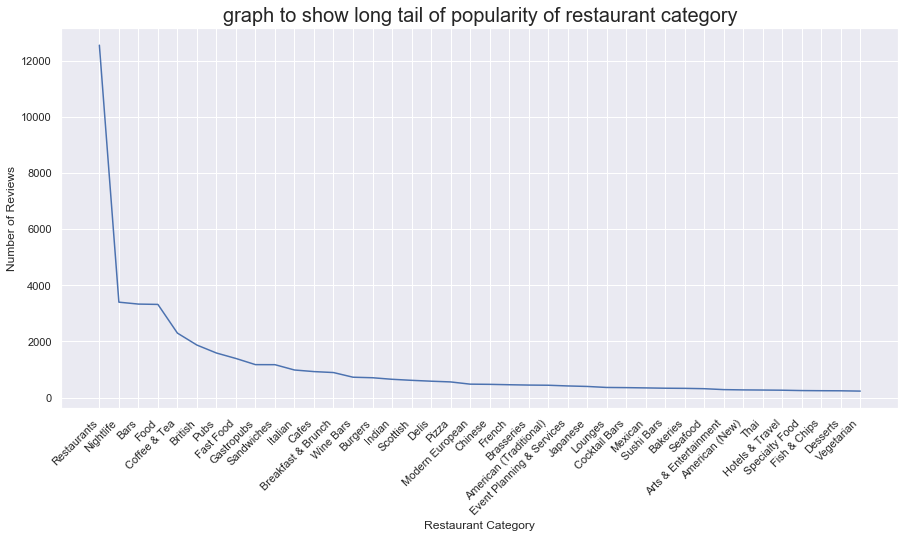

In [445]:
plt.plot(comwords_df['category'], comwords_df['review_count']);
plt.xticks(rotation=45, ha='right');
plt.title('graph to show long tail of popularity of restaurant category', fontsize=20)
plt.xlabel('Restaurant Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)


## The above graph is indicative as the top 4 reviewed categories could be contenders for removal. This grapht to be redrawn without the uneccessary categories and all the missing (less reviewed) categories brought in to see the true long tail. 